[View in Colaboratory](https://colab.research.google.com/github/BlueMoon55/jekyll_python/blob/gh-pages/Tranning,_Colaboratory_2.ipynb)

## Colaboratory へようこそ

Colaboratory は、機械学習の教育や研究の促進を目的とした Google 研究プロジェクトです。完全にクラウドで実行される Jupyter ノートブック環境を特別な設定なしにご利用いただけます。

Colaboratory ノートブックは [Google ドライブ](https://drive.google.com)に保存され、Google ドキュメントや Google スプレッドシートと同じように共有できます。Colaboratory の利用は無料です。

詳細については、[よくある質問](https://research.google.com/colaboratory/faq.html)をご覧ください。

## ローカル ランタイムのサポート

Colaboratory では、ローカルマシン上の Jupyter ランタイムへの接続もサポートしています。詳しくは、[ドキュメント](https://research.google.com/colaboratory/local-runtimes.html)をご覧ください。

## Python 3

Colaboratory では、Python 2 と Python 3 の両方のコードの実行をサポートしています。

* 新しいノートブックを作成するときに、Python 2 と Python 3 のいずれかを選択できます。
* ノートブックに関連付けられている言語を変更することもできます。この情報は `.ipynb` ファイルに書き込まれるため、将来のセッションでも維持されます。

In [0]:
import sys
print('Hello, Colaboratory from Python {}!'.format(sys.version_info[0]))

Hello, Colaboratory from Python 3!


## TensorFlow の実行

Colaboratory では、ワンクリックで TensorFlow のコードをブラウザ上で実行できます。以下の例は 2 つのマトリックスを追加します。

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
import tensorflow as tf
import numpy as np

with tf.Session():
  input1 = tf.constant(1.0, shape=[2, 3])
  input2 = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
  output = tf.add(input1, input2)
  result = output.eval()

result

array([[ 2.,  3.,  4.],
       [ 5.,  6.,  7.]], dtype=float32)

## 視覚化

Colaboratory には [matplotlib](https://matplotlib.org/) などの広く使用されているライブラリが含まれており、視覚化を簡単に行えます。

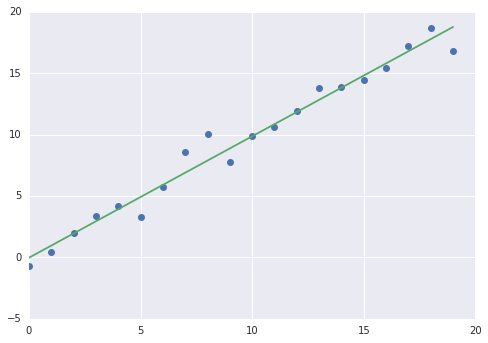

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

新しいライブラリを使用する必要がある場合は、`pip install` でインストールします。一般的に使用されているライブラリをインポートする方法については、[ライブラリのインポートのサンプル ノートブック](/notebooks/snippets/importing_libraries.ipynb)をご覧ください。

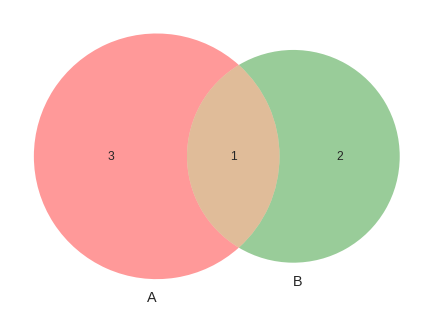

In [0]:
# Only needs to be run once at the top of the notebook.
!pip install -q matplotlib-venn

# Now the newly-installed library can be used anywhere else in the notebook.
from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

# フォーム

フォームを使用してコード内の値をパラメータ化できます。詳しくは、[フォームのサンプル ノートブック](/notebooks/forms.ipynb)をご覧ください。

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


# 詳細情報:
- [Colaboratory の概要](/notebooks/basic_features_overview.ipynb)
- [ライブラリのインポートと依存関係のインストール](/notebooks/snippets/importing_libraries.ipynb)
- [マークダウンに関するガイド](/notebooks/markdown_guide.ipynb)
- [グラフ](/notebooks/charts.ipynb)
- [ウィジェット](/notebooks/widgets.ipynb)
- [データの読み込みと保存: ローカル ファイル、Google ドライブ、Google スプレッドシート、Google Cloud Storage](/notebooks/io.ipynb)
- [Google Cloud BigQuery のサンプル ノートブック](/notebooks/bigquery.ipynb)
- [GPU を使用した TensorFlow](/notebooks/gpu.ipynb)
- [フォーム](/notebooks/forms.ipynb)

# テスト用セクション

In [0]:
!pip install janome

    100% |████████████████████████████████| 20.0MB 1.4MB/s 
  Running setup.py bdist_wheel for janome ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/53/60/be/fe884e2d0ebc9fec0988736cf08a2820ab34e3569fc0c5a25a
Successfully built janome


In [0]:
from janome.tokenizer import Tokenizer # janome.tokenizerをインポート
import re, pprint                      # reとpprintモジュールをインポート

''' 形態素解析を行う
    text   :解析対象の文章
    戻り値 :見出しと品詞のペアを格納した多重リスト
'''    
def analyze(text):
    t = Tokenizer()                 # Tokenizerオブジェクトを生成
    tokens = t.tokenize(text)       # 形態素解析を実行
    result = []                     # 形態素と品詞を格納するリスト
    
    for token in tokens:            # リストからTokenオブジェクトを1つずつ取り出す
        result.append(              # 形態素と品詞情報をリストにしてresultに追加
            [token.surface,         # 形態素を取得
             token.part_of_speech]) # 品詞情報を取得
    return(result)                  # 解析結果の多重リストを返す


'''
品詞が名詞であるかを調べる関数

part   :形態素解析の品詞の部分
戻り値 :名詞であればTrue、そうでなければFalse

'''
def keyword_check(part):
    return re.match(                # 名詞であればTrue、それ以外ばFalseを返す
        '名詞,(一般|固有名詞|サ変接続|形容動詞語幹)',
        part
        )

#=================================================
# プログラムの起点
#=================================================
if __name__  == '__main__':

    print('文章を入力')
    S_input = input()                  # 文章を取得
    pprint.pprint(analyze(S_input))    # 入力された文章を解析


文章を入力
テストです。
[['テスト', '名詞,サ変接続,*,*'], ['です', '助動詞,*,*,*'], ['。', '記号,句点,*,*']]


In [0]:
# from analyzer import *              # analyzerモジュールをインポート
# import analyzer
import os

def make_freq(file):
    """テキストファイルを読み込んで形態素解析結果を返す
       戻り値 : 解析結果を格納した多重リスト
    """
    print('テキストを読み込んでいます...')

    with open(file,                 # ファイル名を指定
              'r',                  # 読み取り専用で開く
              encoding = 'utf_8'    # エンコード方式を指定
              ) as f: 
        text = f.read()             # 全データをtextに格納
    text = re.sub('\n', '', text)   # 文末の改行文字を取り除く
    
    word_dic = {}                   # 語を保持するリスト

    analyze_list = analyze(text)    # 形態素解析の結果をリストとして取得

    for word, part in analyze_list: # 多重リストの要素を2つのパラメーターに取り出す    
        if (keyword_check(part)):   # keyword_check()関数の戻り値がTrueの場合
            if word in word_dic:    # 辞書に語と同じキーがあるか
                word_dic[word] += 1 # キーの値に1加算
            else:                   # 該当するキーがなければ
                 word_dic[word] = 1 # 単語をキーにして値を1にする
    return(word_dic)                # 頻度表としての辞書を返す

def show(word_dic):
    """頻度表を出力する    
    """
    out_file_name = 'freq_'+file_name+'.txt'
    file = open(out_file_name, 'w', encoding = 'utf_8')
    for word in sorted(
        word_dic,                  # 対象の辞書
        key = word_dic.get,        # 並べ替えの基準(key)を辞書の値にする
        reverse = True             # 降順で並べ替え
        ):                        
      print(                       # キー(単語)と値(頻度)を出力
          word + '(' + str(word_dic[word]) + ')'
          )
      file.write(word + ',' + str(word_dic[word]) + '\n')
    file.close()
#=================================================
# プログラムの起点
#=====中小企業における.txt============================================
if __name__  == '__main__':
    print('カレントDIR: '+os.getcwd())
    file_name = input('ファイル名を入力してください>>>')
    freq = make_freq(file_name)   # 頻度表を取得する
    show(freq)                    # 画面表示


カレントDIR: /content
ファイル名を入力してください>>>aa
テキストを読み込んでいます...


FileNotFoundError: ignored

# トレーニング

08-02

In [0]:
import requests
url = 'http://weather.livedoor.com/forecast/webservice/json/v1'
payload = { 'city': '130010' }#①
weather_data = requests.get(url, params=payload).json()#②
for weather in weather_data['forecasts']:#③
    print(
        weather['dateLabel']
        + 'の天気は'
        + weather['telop']
    )
print (weather_data)

今日の天気は晴時々曇
明日の天気は晴時々曇
明後日の天気は曇時々晴
{'pinpointLocations': [{'link': 'http://weather.livedoor.com/area/forecast/1310100', 'name': '千代田区'}, {'link': 'http://weather.livedoor.com/area/forecast/1310200', 'name': '中央区'}, {'link': 'http://weather.livedoor.com/area/forecast/1310300', 'name': '港区'}, {'link': 'http://weather.livedoor.com/area/forecast/1310400', 'name': '新宿区'}, {'link': 'http://weather.livedoor.com/area/forecast/1310500', 'name': '文京区'}, {'link': 'http://weather.livedoor.com/area/forecast/1310600', 'name': '台東区'}, {'link': 'http://weather.livedoor.com/area/forecast/1310700', 'name': '墨田区'}, {'link': 'http://weather.livedoor.com/area/forecast/1310800', 'name': '江東区'}, {'link': 'http://weather.livedoor.com/area/forecast/1310900', 'name': '品川区'}, {'link': 'http://weather.livedoor.com/area/forecast/1311000', 'name': '目黒区'}, {'link': 'http://weather.livedoor.com/area/forecast/1311100', 'name': '大田区'}, {'link': 'http://weather.livedoor.com/area/forecast/1311200', 'name': '世田谷区'}, {'link

Weather Hack JSON

In [0]:
import requests
import pprint
url = 'http://weather.livedoor.com/forecast/webservice/json/v1'
payload = { 'city': '130010' }#①
weather_data = requests.get(url, params=payload).json()#②
for weather in weather_data['forecasts']:#③
    print(
        weather['dateLabel']
        + 'の天気は'
        + weather['telop']
    )
pprint.pprint (weather_data)


今日の天気は晴時々曇
明日の天気は晴時々曇
明後日の天気は曇時々晴
{'copyright': {'image': {'height': 26,
                         'link': 'http://weather.livedoor.com/',
                         'title': 'livedoor 天気情報',
                         'url': 'http://weather.livedoor.com/img/cmn/livedoor.gif',
                         'width': 118},
               'link': 'http://weather.livedoor.com/',
               'provider': [{'link': 'http://tenki.jp/', 'name': '日本気象協会'}],
               'title': '(C) LINE Corporation'},
 'description': {'publicTime': '2018-08-02T10:35:00+0900',
                 'text': ' 本州付近は高気圧に覆われています。\n'
                         '\n'
                         '【関東甲信地方】\n'
                         ' 関東甲信地方は、おおむね晴れとなっています。\n'
                         '\n'
                         ' 2日から3日にかけては、高気圧に覆われておおむね晴れますが、午後は\n'
                         '大気の状態が不安定となるため、雨や雷雨となり、激しく降る所がある見込\n'
                         'みです。\n'
                         '\n'
                         ' 関東近海では、3日にかけて波がやや高く、2日はうねりを伴う

08-03

In [0]:
import requests
rq = requests.get('http://www.metro.tokyo.jp')
print (rq.status_code)
print (rq.headers)
print (rq.encoding)
print (rq.text)

200
{'Date': 'Thu, 02 Aug 2018 02:57:58 GMT', 'Last-Modified': 'Thu, 02 Aug 2018 00:04:34 GMT', 'ETag': '"fe4357-48be-572688e5a4880"', 'Accept-Ranges': 'bytes', 'Content-Length': '18622', 'Content-Type': 'text/html', 'X-Pad': 'avoid browser bug', 'Via': '1.1 ID-0002262070470144 uproxy-2', 'X-Frame-Options': 'SAMEORIGIN'}
ISO-8859-1
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html lang="ja">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<meta http-equiv="Content-Style-Type" content="text/css">
<meta http-equiv="Content-Script-Type" content="text/javascript">

<title>æ±äº¬é½å¬å¼ãã¼ã ãã¼ã¸</title>
<meta name="description" content="æ±äº¬é½åºã®å¬å¼ãã¼ã ãã¼ã¸ãé½æ¿ã«é¢ããææ°æå ±ãè¨èä¼è¦ãé½è­°ä¼ãåå±ã®æå ±ãçµ±è¨ãå¥æ­ã»å¥ç´æå ±ãç¥äºã¸ã®æè¨ãªã©ã">

<meta name="author" content="æ±äº¬é½">
<meta name="viewport" content="width=d

08-03 mediawiki

In [0]:
import sys

title = input('何を検索しますか? >') 
url = 'https://ja.wikipedia.org/w/api.php'
api_params1 = {
                'action': 'query',
                'titles': title,
                'prop': 'categories',
                'format': 'json'
              }

api_params2 = {
                'action': 'query',
                'titles': title,
                'prop': 'revisions',
                'rvprop': 'content',
                'format': 'xmlfm'
              }
categories = requests.get(url, params=api_params1).json()
page_id = categories['query']['pages']
if '-1' in page_id:
    print('該当するページがありません')
    sys.exit()
    
else:
    id = list(page_id.keys())
    if 'categories' in categories['query']['pages'][id[0]]:
        categories = categories['query']['pages'][id[0]]['categories']
        for t in categories:
            print(t['title'])
    else:
        print('保存できるページを検索できませんでした')
        sys.exit()

admit = input('検索結果を保存しますか?(yes) >') 
if admit == 'yes':
    data = requests.get(url, params=api_params2)
    with open(title + '.html', 'w', encoding = 'utf_8') as f:
        f.write(data.text)
else:
    print('プログラムを終了します')
    sys.exit()

 

HeadLine（RSS）

In [16]:
import requests
from bs4 import BeautifulSoup

xml = requests.get('http://news.yahoo.co.jp/pickup/science/rss.xml')
soup = BeautifulSoup(xml.text, 'html.parser')
for news in soup.findAll('item'):
    print(news.title.string, news)

風疹流行の兆し 予防接種を <item>
<title>風疹流行の兆し 予防接種を</title>
<link/>https://news.yahoo.co.jp/pickup/6293452
<pubdate>Tue, 14 Aug 2018 21:39:59 +0900</pubdate>
<guid ispermalink="false">yahoo/news/topics/6293452</guid>
</item>
アマゾンで新種のラン発見 <item>
<title>アマゾンで新種のラン発見</title>
<link/>https://news.yahoo.co.jp/pickup/6293539
<pubdate>Wed, 15 Aug 2018 15:01:56 +0900</pubdate>
<enclosure length="133" type="image/gif" url="https://s.yimg.jp/images/icon/photo.gif">
</enclosure>
<guid ispermalink="false">yahoo/news/topics/6293539</guid>
</item>
宇宙エレベーター 福島で実験 <item>
<title>宇宙エレベーター 福島で実験</title>
<link/>https://news.yahoo.co.jp/pickup/6293439
<pubdate>Tue, 14 Aug 2018 19:29:58 +0900</pubdate>
<enclosure length="133" type="image/gif" url="https://s.yimg.jp/images/icon/photo.gif">
</enclosure>
<guid ispermalink="false">yahoo/news/topics/6293439</guid>
</item>
熱中症と似た症状 脳梗塞注意 <item>
<title>熱中症と似た症状 脳梗塞注意</title>
<link/>https://news.yahoo.co.jp/pickup/6293435
<pubdate>Tue, 14 Aug 2018 18:51:57 +0900</pubdate>
<en

test

In [5]:
import requests
from bs4 import BeautifulSoup

target_url = 'http://news.yahoo.co.jp/pickup/science/rss.xml'
r = requests.get(target_url)         #requestsを使って、webから取得
soup = BeautifulSoup(r.text, 'lxml') #要素を抽出

for a in soup.find_all('a'):
      print(a.get('href'))         #リンクを表示

FeatureNotFound: ignored